In [1]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from math import *

### Task 1.A

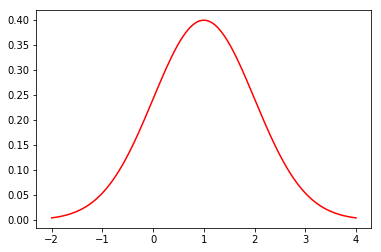

In [2]:
fig, ax = plt.subplots(1, 1)
mx = 1; sx = 1
x = np.linspace(-2,4,200)
p =  norm.pdf(x, mx, sx)
plt.plot(x, p, 'r-', label='norm pdf')

### Task 1.B

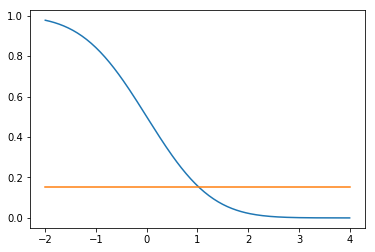

F(x>1)=0.15503494900490788


In [3]:
fig, ax = plt.subplots(1, 1)
i1 = list(x).index(1.0150753768844218)
F = 1-norm.cdf(x)
ax.plot(x, F )
ax.plot(x, F[i1]*np.ones_like(x) )
plt.show()
print("F(x>1)="+str(F[i1]))

### Task 1.C

p(x|z=0.75) = p(0.75|x) * p(x) / p(0.75)

In [10]:
def pdf(x, mx, sigma):
    p = exp(-(x-mx)**2/2)/sqrt(2*pi*sigma**2)
    return p

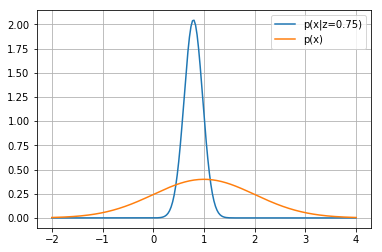

In [4]:
Z = 0.75
sigma = sqrt(0.2)
N = norm.pdf(0.75, x, sigma**2)
p_x_given_z = N * norm.pdf(x,mx,sigma) / norm.pdf(0.75,mx,sigma)
plt.plot(x, p_x_given_z)
plt.plot(x, p)
plt.grid()
plt.legend(['p(x|z=0.75)', 'p(x)'])

### Task 1.D

In [5]:
E = round( x[ list(p_x_given_z).index(max(p_x_given_z)) ],3)
print("Estimate the expected value of the posterior distance to the wall"+"\n"+"E(x|0.75)="+str(E))

Estimate the expected value of the posterior distance to the wall
E(x|0.75)=0.804


### Task 1.E

Product rule:
p(x,z) = p(x|z) * p(z)

In [6]:
def condprob(x,z=0.75,mx=1,sigma=sqrt(0.2)):
    N = norm.pdf(z, x, sigma**2)
    p_x_given_z = N * norm.pdf(x,mx,sigma) / norm.pdf(z,mx,sigma)
    return p_x_given_z

In [7]:
z = x
p_joint = np.zeros((len(x), len(z)))
for X in range(len(x)):
    for Z in range(len(z)):
        p_joint[X,Z] = condprob(x[X],z[Z]) * norm.pdf(z[Z])


In [8]:
X = np.zeros((len(x),len(z)))
Z = np.zeros((len(x), len(z)))
for i in range(len(x)):
    X[i,:] = x
    Z[i,:] = z

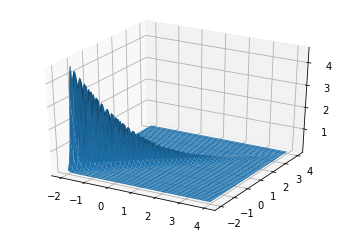

In [9]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

X, Z = np.meshgrid(x, z)


# Plot the surface.
surf = ax.plot_surface(X, Z, p_joint)
plt.show()

### Task 2.A

In [10]:
from scipy.linalg import cholesky

def plot2dcov(mean, sigma2D, k=1, n_samples=100):
    sigma2D = np.array(sigma2D)
    L = cholesky(sigma2D).T
    t = np.linspace(0,2*pi,n_samples)
    xe = np.array([]); ye = np.array([])
    for T in t:
        [Xe, Ye] = np.dot(L, k*np.array([cos(T),sin(T)]))
        xe=np.append(xe,Xe); ye=np.append(ye,Ye)
    xe += mean[0]; ye += mean[1]
    
    return xe, ye

In [11]:
M1 = [0,0]; E1 = np.array([[1,0], [0,2]])
M2 = [5,0]; E2 = np.array([[3,-0.4], [-0.4,2]])
M3 = [2,2]; E3 = np.array([[9.1,6], [6,4]])

In [12]:
def plotellipse(M,E, K=[1]):
    fig = plt.figure()
    fig.set_size_inches(40, 40)
    ax = fig.add_subplot(311, aspect='equal')
    for i in range(len(K)):
        xe, ye = plot2dcov(mean=M, sigma2D=E, k=K[i])
        plt.plot(xe,ye)
    plt.grid()
    plt.legend(['K=1','K=2', 'K=3'])
    plt.show()

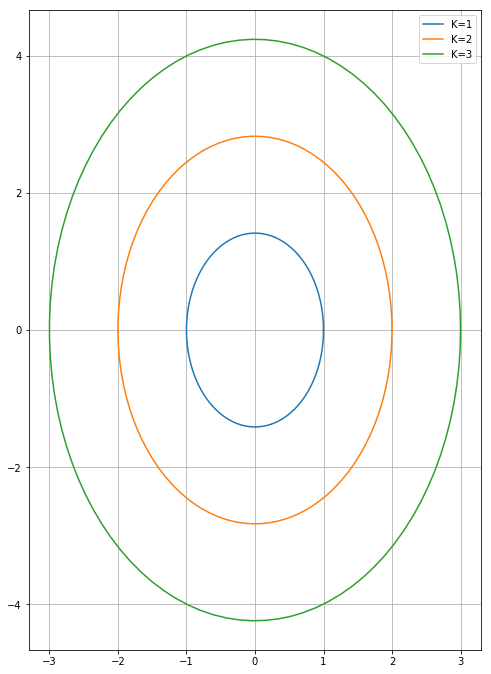

In [13]:
plotellipse(M1,E1, K=[1,2,3])

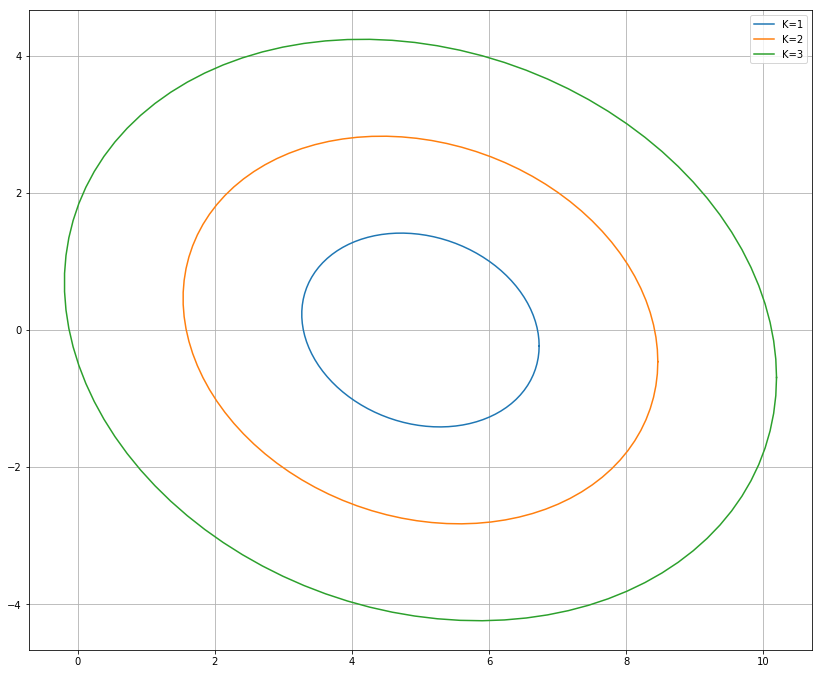

In [14]:
plotellipse(M2,E2, K=[1,2,3])

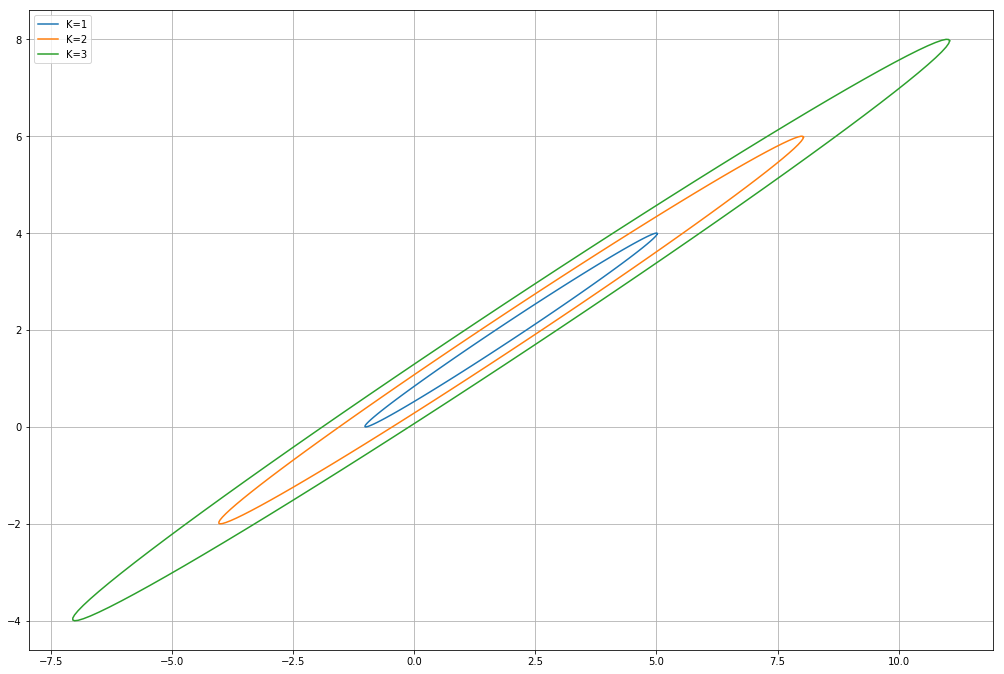

In [15]:
plotellipse(M3,E3, K=[1,2,3])

### Task 2.B

Sample mean:
$$\bar{x}=\frac{1}{N}\sum_{i=0}^N \bar{x_{i}}$$

In [16]:
def sample_mean(samples):
    sample_mean = np.zeros((len(samples),1))
    for i in range(len(samples)):
        sample_mean[i] = np.mean(samples[i])
    return sample_mean

Sample covariance matrix:
$$Q=\frac{1}{N-1}\sum_{i=1}^N (\bar{x_{i}}-\bar{x})(\bar{x_{i}}-\bar{x})^T$$

In [19]:
def sample_cov(samples):
    Q = np.cov(samples)
    return Q

### Task 2.C

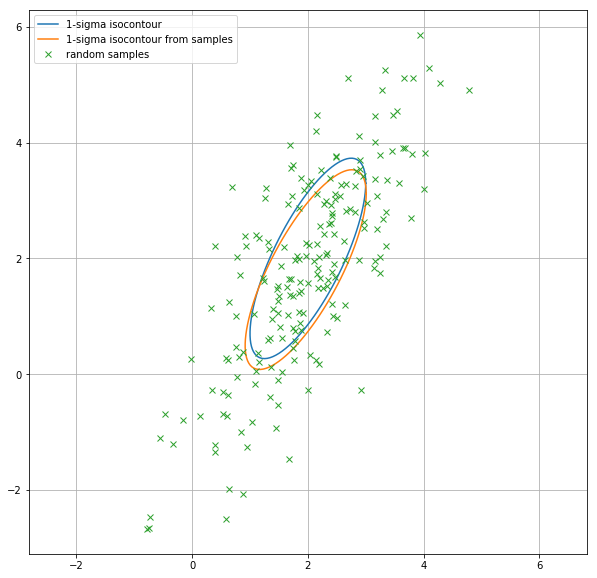

mean = [[1.96]
 [1.81]]
covariance matrix:
Q = [[1.1  1.38]
 [1.38 2.98]]


In [20]:
mean = np.array([2,2]).T
cov = np.array([[1, 1.3], [1.3, 3]])

fig = plt.figure()
fig.set_size_inches(10, 10)
xe, ye = plot2dcov(mean=mean, sigma2D=cov, k=[1])
plt.plot(xe,ye)
n_samples = 200
x, y = np.random.multivariate_normal(mean, cov, n_samples).T
M = sample_mean([x,y])
Q = sample_cov([x,y])
xs, ys = plot2dcov(mean=M, sigma2D=Q, k=[1])
plt.plot(xs,ys)
plt.plot(x, y, 'x')
plt.axis('equal')
plt.grid()
plt.legend(["1-sigma isocontour", "1-sigma isocontour from samples", "random samples"])
plt.show()
print("mean = "+str(np.round(M,2)))
print("covariance matrix:\nQ = "+str(np.round(Q,2)))

| $N_{samples}$ | 100   | 200   | 300   | 400   | 500   | 1000   | 10000   |
|------|------|------|------|------|------|------|------|
|   Mean  | $\begin{array}{cc}1.93\\1.73\end{array}$|$\begin{array}{cc}1.93\\1.87\end{array}$|$\begin{array}{cc}2.0\\2.06\end{array}$|$\begin{array}{cc}2.05\\2.27\end{array}$|$\begin{array}{cc}2.0\\2.01\end{array}$|$\begin{array}{cc}2.03\\2.1\end{array}$|$\begin{array}{cc}2.02\\2.05\end{array}$|
|   Cov  | $\begin{array}{cc}1.16 & 1.44\\1.44 & 2.98\end{array}$|$\begin{array}{cc}1.13 & 1.42\\1.42 & 3.09\end{array}$|$\begin{array}{cc}0.93 & 1.16\\1.16 & 3.02\end{array}$|$\begin{array}{cc}0.88 & 1.07\\1.07 & 2.38\end{array}$|$\begin{array}{cc}1.06 & 1.39\\1.39 & 3.19\end{array}$|$\begin{array}{cc}0.94 & 1.19\\1.19 & 2.86\end{array}$|$\begin{array}{cc}1.07 & 1.35\\1.35 & 2.96\end{array}$|

### Task 3.A

$$ \left[\begin{array}{cc}x\\y\end{array} \right]_t = \left[\begin{array}{cc}1+\delta t & 0\\0 & 1\end{array} \right] \left[\begin{array}{cc}x\\y\end{array} \right]_{t-1} + \left[\begin{array}{cc}2\delta t\\0\end{array} \right]_t $$

1.0
2.5
4.75
8.125
13.1875


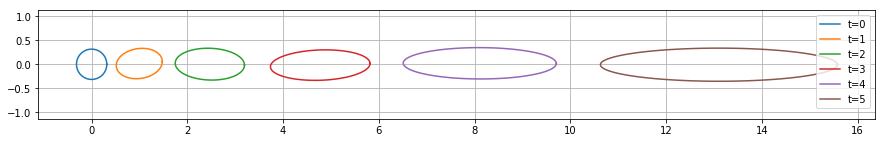

In [21]:
s0 = np.array([0,0]).T
n_samples = 500
mean0 = s0; cov0 = np.array([[0.1, 0], [0, 0.1]])
dt = 0.5
A = np.array([[1+dt,0],[0,1]]); b = np.array([2*dt, 0]).T
xs, ys = plot2dcov(mean=mean0, sigma2D=cov0, k=[1])
fig = plt.figure()
fig.set_size_inches(15, 2)
plt.plot(xs, ys)
legend_list=["t=0"]
for i in range(5):
    s = np.dot( A, s0) + b
    s0 = s
    mean = np.dot(A, mean0) + b
    mean0 = mean
    cov = np.dot( np.dot(A, cov0), A.T )
    cov0 = cov
    
    x, y = np.random.multivariate_normal(mean, cov, n_samples).T
    M = sample_mean([x,y])
    Q = sample_cov([x,y])
    xs, ys = plot2dcov(mean=M, sigma2D=Q, k=[1])
    legend_list.append("t="+str(i+1))
    plt.plot(xs, ys)
    plt.legend(legend_list)
    plt.axis('equal')
    plt.grid()
    print(mean[0])

### Task 3.B

In [2]:
import matplotlib.image as mpimg

In [3]:
def show_image(name):
    img=mpimg.imread(name)
    fig = plt.figure(figsize=(20,20))
    imgplot = plt.imshow(img)
    plt.show()

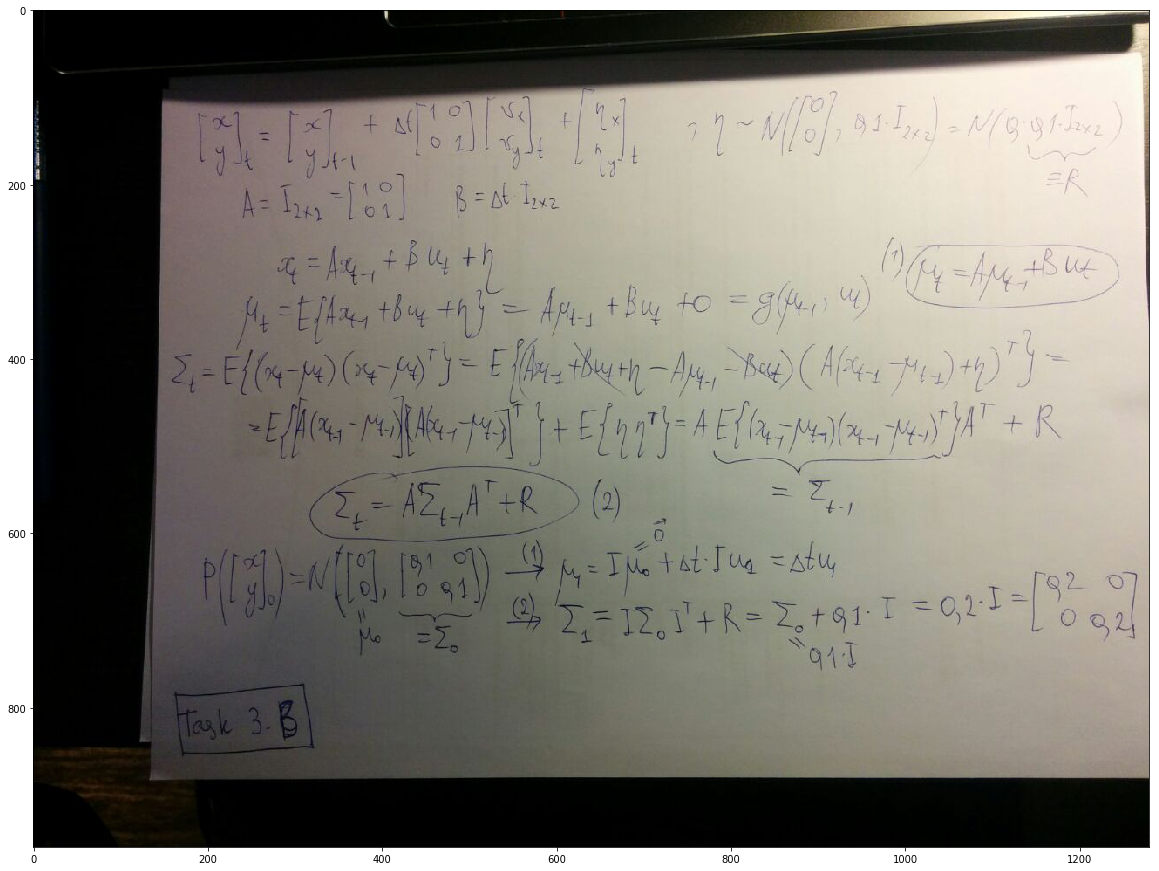

In [205]:
show_image('task3B.jpg')

### Task 3.C

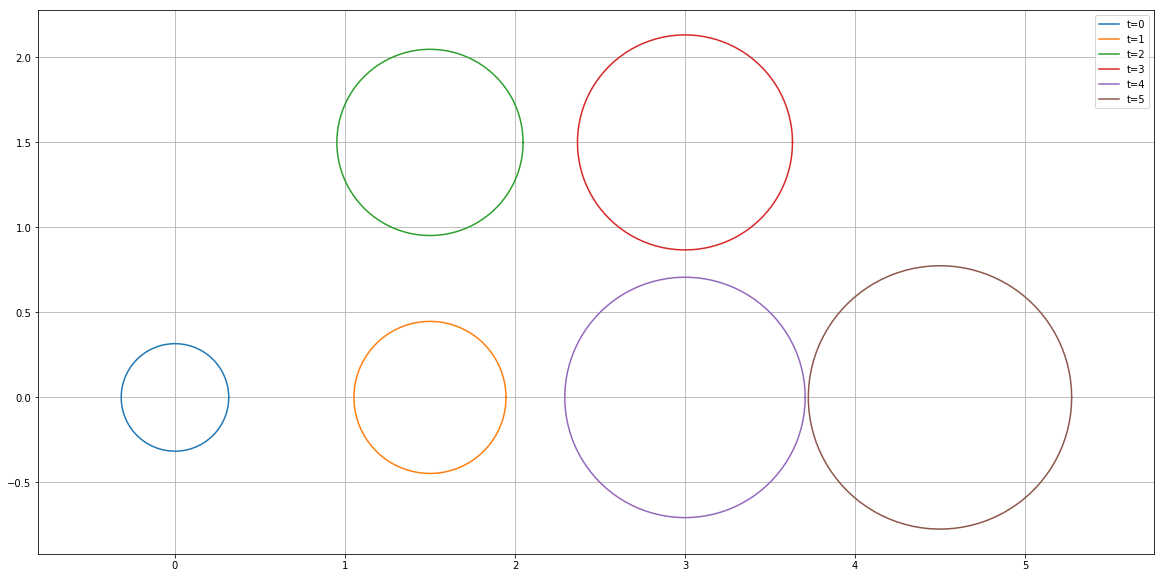

In [85]:
u = np.array([np.array([[3],[0]]),
              np.array([[0],[3]]),
              np.array([[3],[0]]),
              np.array([[0],[-3]]),
              np.array([[3],[0]])])
A = np.eye(2)
B = dt * np.eye(2)
R = 0.1 * np.eye(2)

mean0 = np.zeros((2,1))
cov0 = 0.1 * np.eye(2)

plt.figure(figsize=(20,10))
legend_list=[]
xs, ys = plot2dcov(mean0, cov0, k=[1])
legend_list.append("t="+str(0))
plt.plot(xs, ys)
plt.legend(legend_list)
plt.axis('equal')
plt.grid()
for i in range(len(u)):
    mean_u = u[i]
    mean = np.dot( A, mean0 ) + np.dot( B, mean_u )
    mean0 = mean
    
    cov = cov0 + R
    cov0 = cov
    
    xs, ys = plot2dcov(mean, cov, k=[1])
    legend_list.append("t="+str(i+1))
    plt.plot(xs, ys)
    plt.legend(legend_list)
    plt.axis('equal')

### Task 3.D

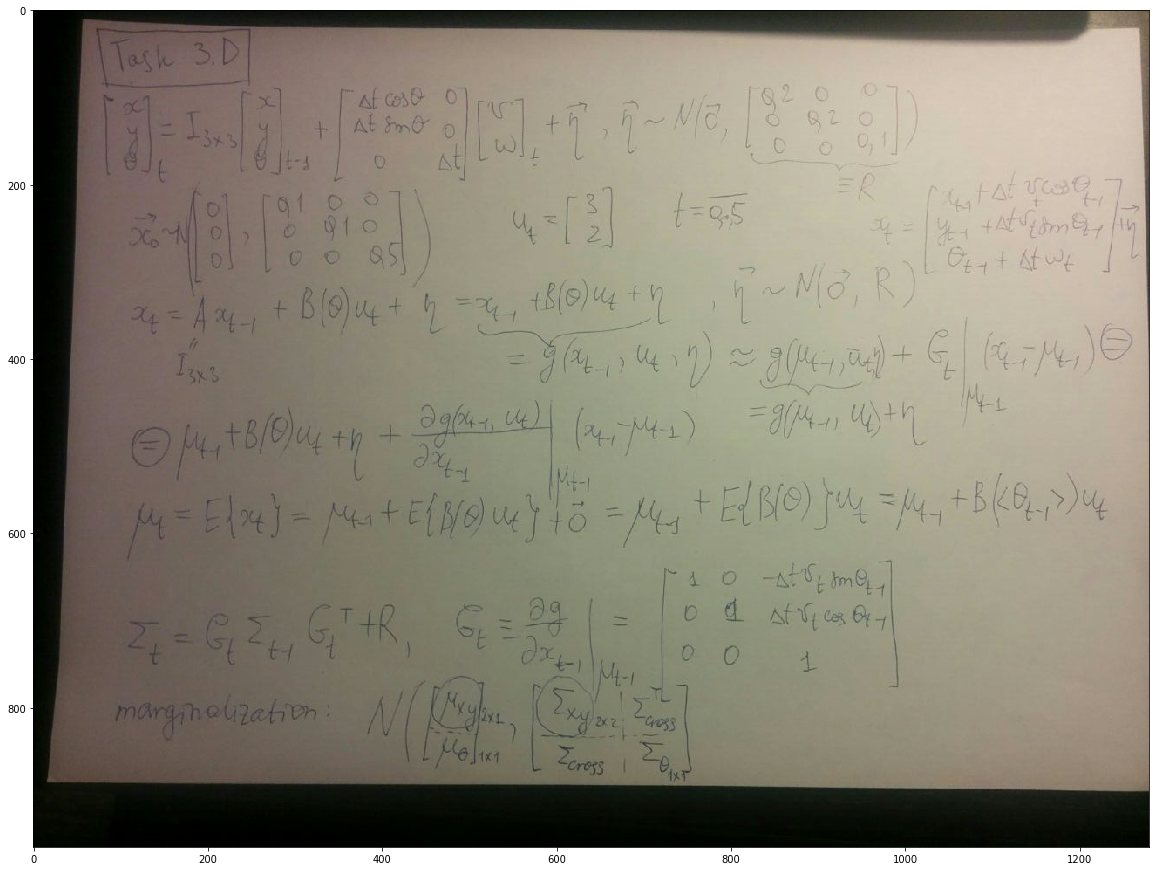

In [206]:
show_image('task3D.jpg')

In [89]:
def control_matrix(dt, theta):
    return np.array([[dt*cos(theta), 0], [dt*sin(theta), 0], [0, dt]])

In [97]:
def jacobian(dt, v, theta):
    return np.array([[1, 0, -dt*v*sin(theta)],
                     [0, 1, dt*v*cos(theta)],
                     [0, 0, 1             ]])

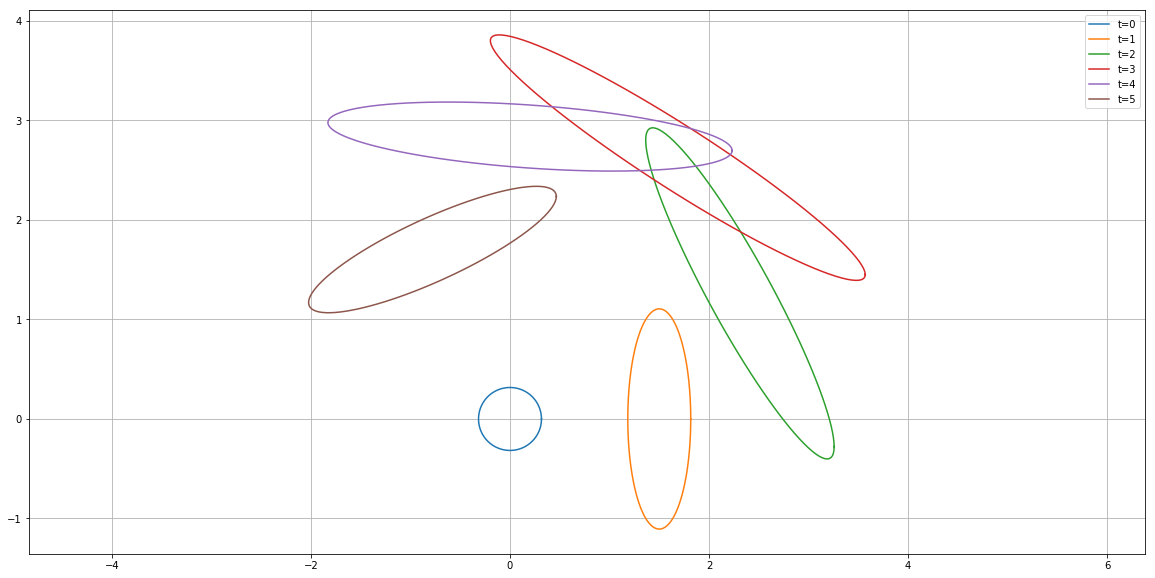

In [108]:
A = np.eye(3)
theta0 = 0
B = control_matrix(dt, theta0)
mean0 = np.zeros((3,1))
cov0 = np.diag([0.1, 0.1, 0.5])
R = np.diag([0.2, 0.2, 0.1])
u = np.array([[3],[2]])

legend_list = []
figure = plt.figure(figsize=(20,10))
x, y = plot2dcov(mean0[:2], cov0[:2,:2], k=[1])
legend_list.append("t="+str(0))
plt.plot(x, y)
plt.legend(legend_list)
plt.axis('equal')
for i in range(5):
    mean = mean0 + np.dot( control_matrix(dt, mean0[2]), u)
    G = jacobian(dt, u[0], mean0[2])
    cov = np.dot( np.dot( G, cov0 ), G.T )
    mean0 = mean
    cov0 = cov

    x, y = plot2dcov(mean[:2], cov[:2,:2], k=[1])
    legend_list.append("t="+str(i+1))
    plt.plot(x, y)
    plt.legend(legend_list)
    plt.axis('equal')
plt.grid()

### Task 3.E

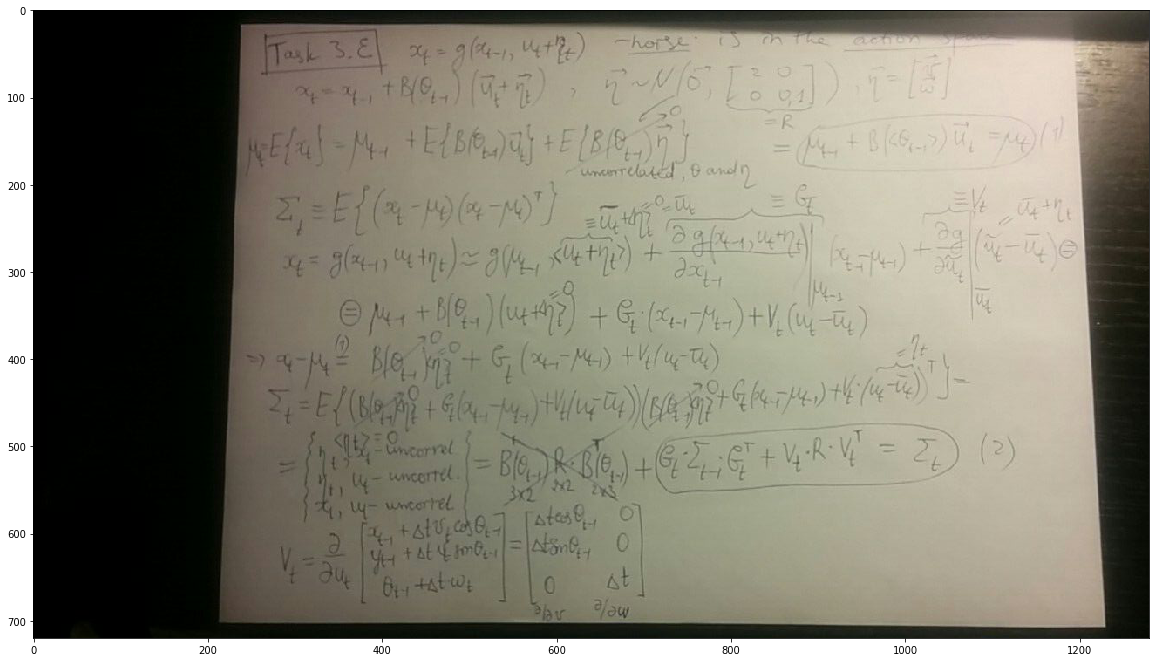

In [207]:
show_image('task3E.jpg')

In [111]:
def jacobianV(dt, theta):
    return np.array([[dt*cos(theta), 0],
                     [dt*sin(theta), 0],
                     [0,            dt]])

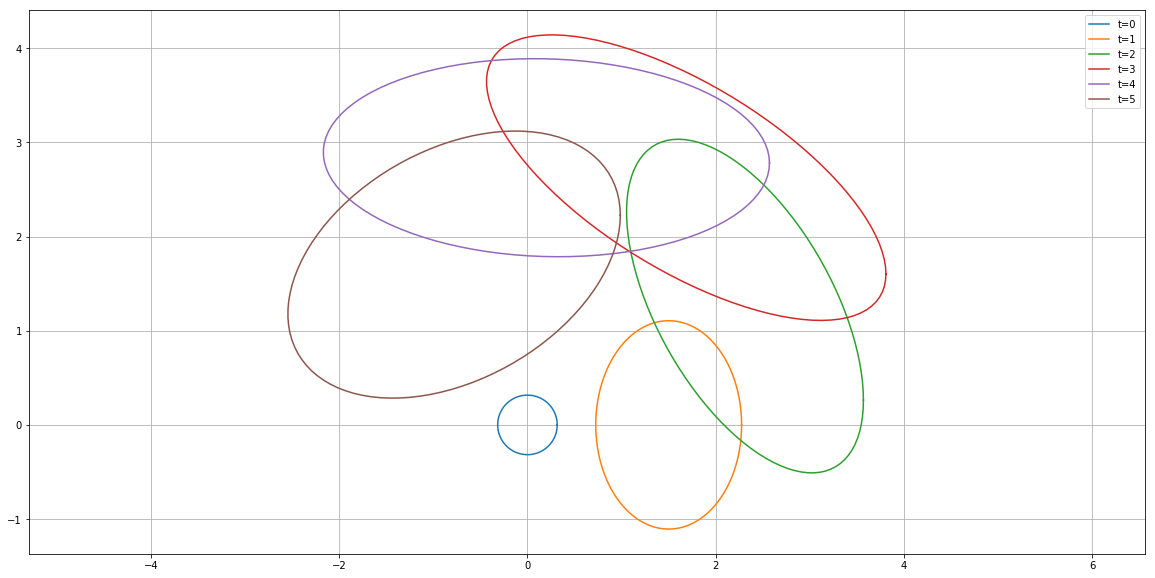

In [115]:
A = np.eye(3)
theta0 = 0
B = control_matrix(dt, theta0)
mean0 = np.zeros((3,1))
cov0 = np.diag([0.1, 0.1, 0.5])
R = np.diag([2, 0.1])
u = np.array([[3],[2]])

legend_list = []
figure = plt.figure(figsize=(20,10))
x, y = plot2dcov(mean0[:2], cov0[:2,:2], k=[1])
legend_list.append("t="+str(0))
plt.plot(x, y)
plt.legend(legend_list)
plt.axis('equal')
for i in range(5):
    mean = mean0 + np.dot( control_matrix(dt, mean0[2]), u)
    G = jacobian(dt, u[0], mean0[2])
    V = jacobianV(dt, mean0[2])
    cov = np.dot( np.dot( G, cov0 ), G.T ) + np.dot( np.dot( V, R ), V.T )
    mean0 = mean
    cov0 = cov

    x, y = plot2dcov(mean[:2], cov[:2,:2], k=[1])
    legend_list.append("t="+str(i+1))
    plt.plot(x, y)
    plt.legend(legend_list)
    plt.axis('equal')
plt.grid()

### Task 4.A

In [2]:
data = np.load('t4')

In [3]:
dt = float(data['dt'])
N = int(data['N'])
P_0 = float(data['P_0'])
Q = np.float(data['Q'])
R = np.float(data['R_action'])
t = np.array(data['t'])
u = np.array(data['u'])
x_0 = float(data['x_0'])
x_real = np.array(data['x_real'])
z = np.array(data['z'])

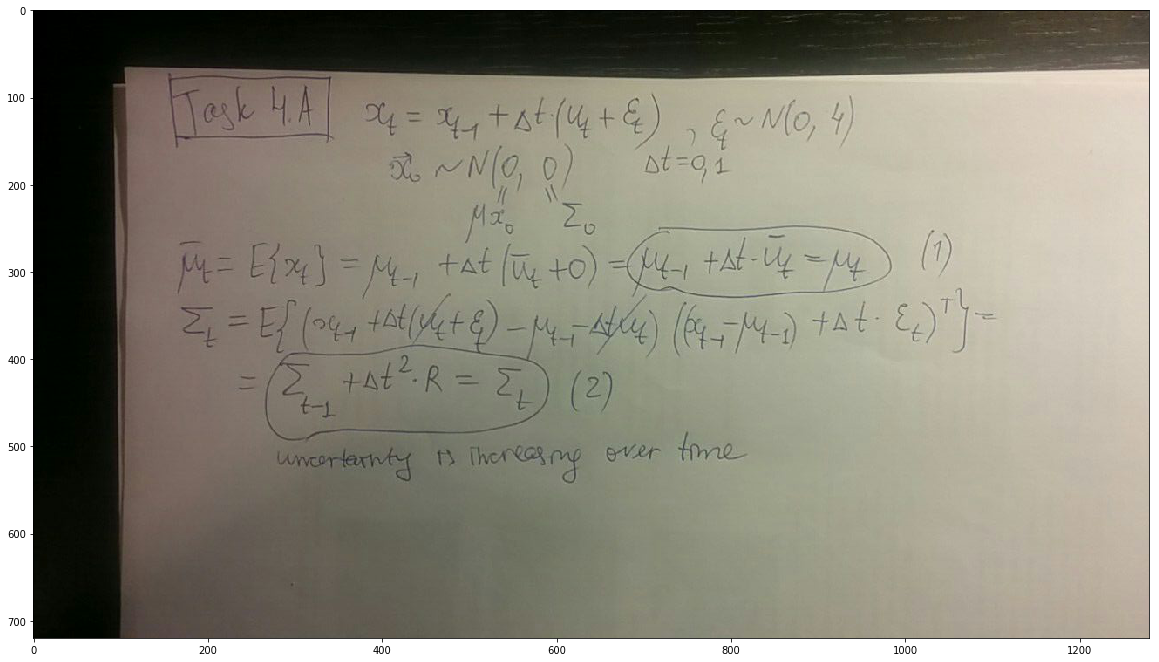

In [208]:
show_image('task4A.jpg')

In [4]:
me = 0; cove =4
x = [x_0]
x_prev = x[0]
for i in range(N-1):
    e = np.random.normal(me, cove)
    x.append(x_prev + dt*(u[i] + e))
    x_prev = x[-1]
    
x = np.array(x)

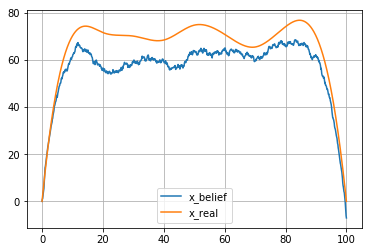

In [5]:
plt.plot(t,x)
plt.plot(t,x_real)
plt.grid()
plt.legend(['x_belief', 'x_real'])
plt.show()

### Task 4.B

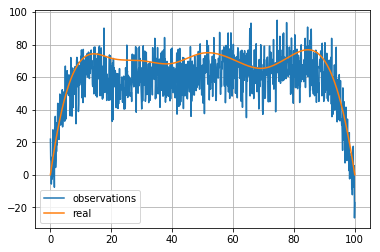

In [6]:
md = 0; covd = Q
z = np.zeros_like(x)
for i in range(N):
    d = np.random.normal(md, covd)
    z[i] = x[i] + d

plt.plot(t,z)
plt.plot(t,x_real)
plt.grid()
plt.legend(['observations','real'])
plt.show()

### Task 4.C

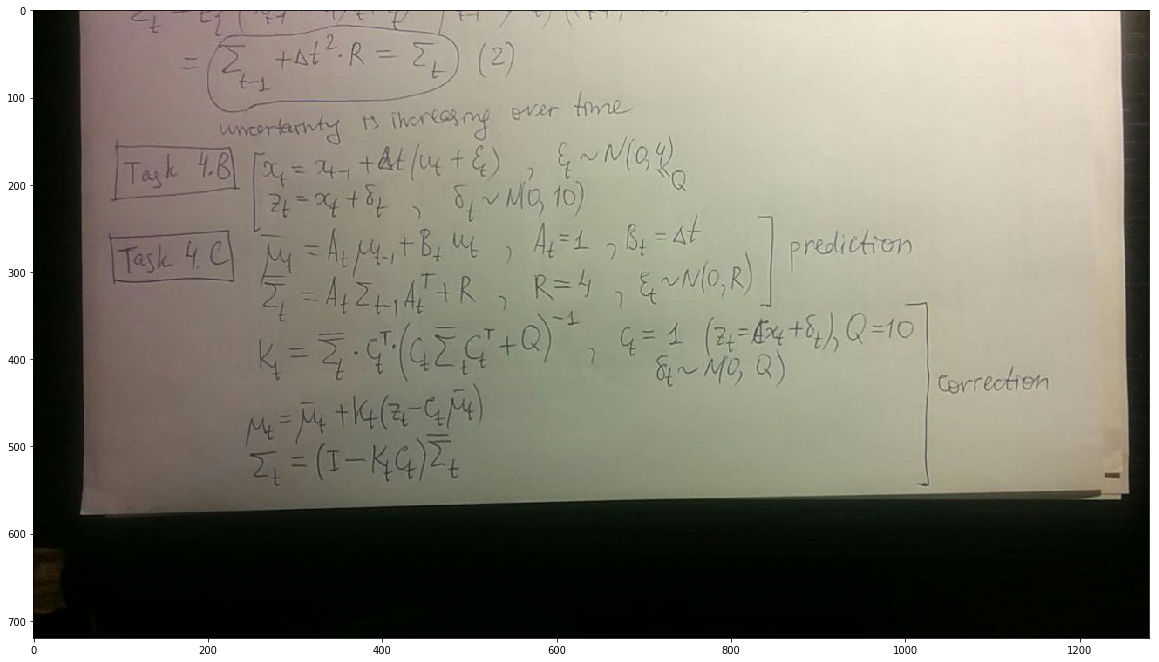

In [213]:
show_image('task4C.jpg')

In [7]:
A = np.array(1)
B = np.array(dt)
C = np.array(1)

In [381]:
def kalman1D(R,Q, u,z, mu0=0,cov0=0):
    N = len(z)
    mu = mu0; cov = cov0
    x_pred = np.array([mu0])
    x_cor = np.array([mu0])
    sigma_pred = np.array([mu0])
    sigma_cor = np.array([mu0])
    for i in range(N-1):
        # prediction:
        mu_pred = mu + 0.1*u[i]
        cov_pred = cov + R
        
        #correction:
        K = cov_pred / (cov_pred + Q) 
        mu = mu_pred + K * (z[i]-mu_pred)
        cov = (1-K) * cov_pred
        
        x_pred = np.append(x_pred, mu_pred)
        x_cor = np.append(x_cor, mu)
        sigma_pred = np.append(sigma_pred, cov_pred)
        sigma_cor = np.append(sigma_cor, cov)
    
    return x_cor, sigma_cor, x_pred, sigma_pred

In [8]:
def kalman(A,B,C,R,Q, u,z, mu0,cov0):
    N = len(z)
    mu_pred = np.zeros_like(z)
    cov_pred = np.zeros_like(z)
    mu = np.zeros_like(z)
    cov = np.zeros_like(z)
    mu[0] = mu0; cov[0] = cov0
    for i in range(1,N-1):
        # prediction:
        mu_pred[i] = np.dot(A, mu[i-1]) + np.dot(B, u[i])
        cov_pred[i] = np.dot( np.dot(A,cov[i-1]), A.T ) + R
        # correction:
        if len([mu[i]])<2:
            K = np.dot( np.dot(cov_pred[i], C.T), 1.0/(np.dot( np.dot(C,cov_pred[i]), C.T ) + Q) )
        else:
            K = np.dot( np.dot(cov_pred[i], C.T), np.linalg.inv(np.dot( np.dot(C,cov_pred[i]), C.T ) + Q) )
        mu[i] = mu_pred[i] + np.dot( K, (z[i]-np.dot(C,mu_pred[i])) )
        cov[i] = np.dot( (np.eye(len([mu[i]]))-np.dot(K,C)), cov_pred[i] )

    return mu,cov, mu_pred,cov_pred

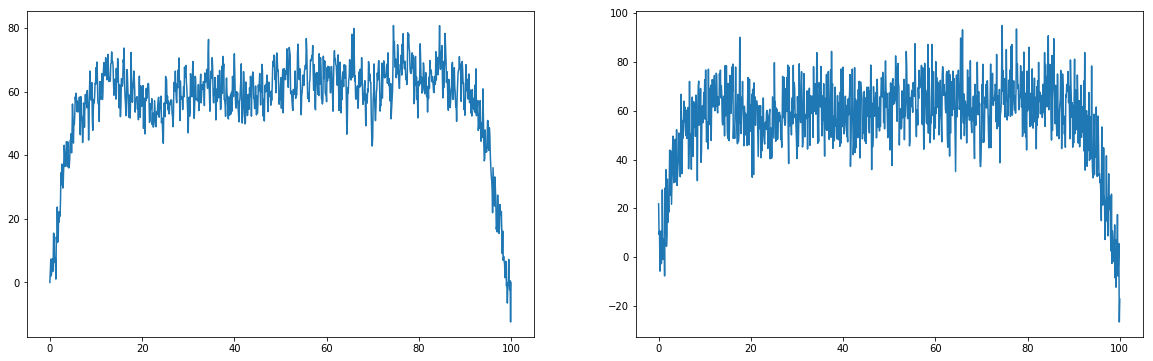

In [10]:
x_cor, cov_cor, x_pred, cov_pred=kalman(A,B,C,R,Q, u,z, mu0=0,cov0=0)
fig = plt.figure(figsize=(20,6))
fig.add_subplot(121)
plt.plot(t,x_cor)
fig.add_subplot(122)
plt.plot(t,z)
plt.show()

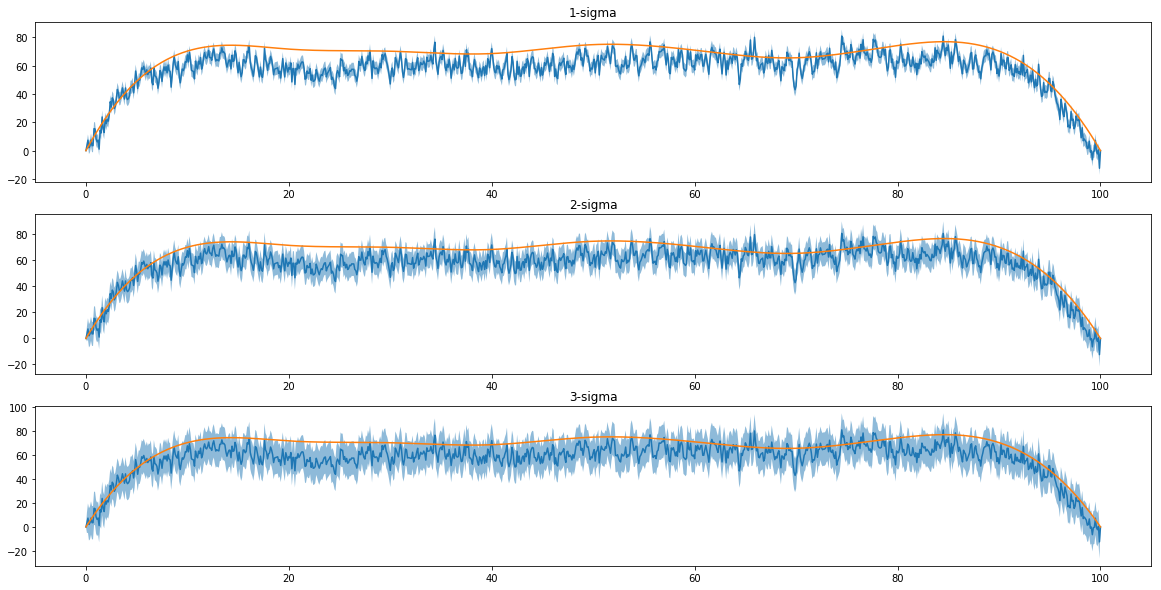

In [11]:
from ciplot import *
fig = plt.figure(figsize=(20,10))
fig.add_subplot(311)
ciplot(t, mu=x_cor, minus_sigma=x_cor-cov_cor, plus_sigma=x_cor+cov_cor, x_real=x_real, color=None)
plt.title('1-sigma')
fig.add_subplot(312)
ciplot(t, mu=x_cor, minus_sigma=x_cor-2*cov_cor, plus_sigma=x_cor+2*cov_cor, x_real=x_real, color=None)
plt.title('2-sigma')
fig.add_subplot(313)
ciplot(t, mu=x_cor, minus_sigma=x_cor-3*cov_cor, plus_sigma=x_cor+3*cov_cor, x_real=x_real, color=None)
plt.title('3-sigma')
plt.show()

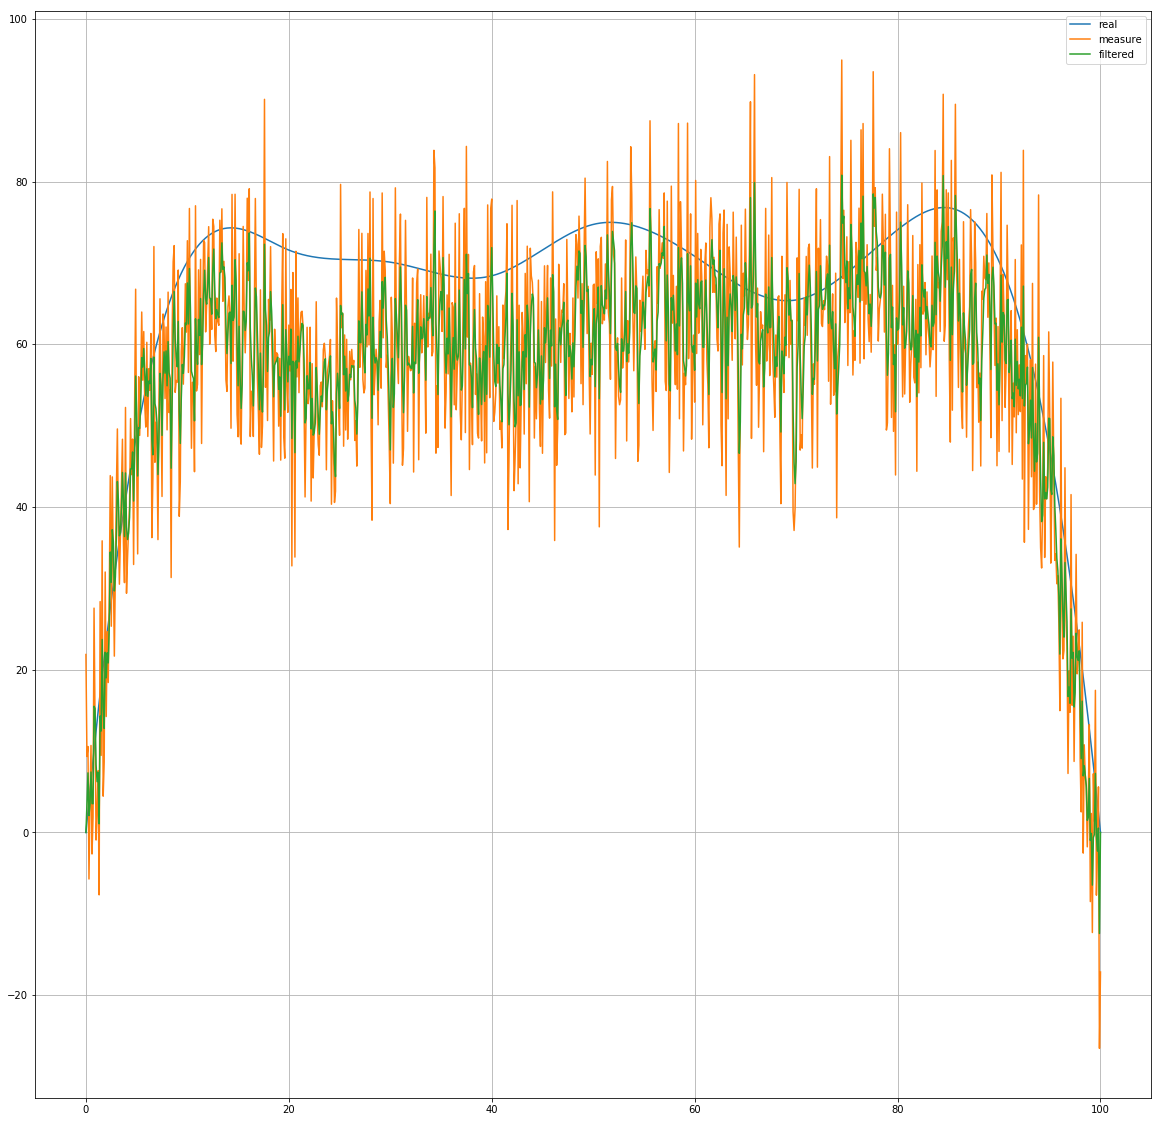

In [12]:
fog = plt.figure(figsize=(20,20))
plt.plot(t,x_real)
plt.plot(t,z)
plt.plot(t,x_cor)
plt.legend(['real','measure','filtered'])
plt.grid()
plt.show()